# **Project 1 - Vehicle Sales Analysis**
## _Marshall Prose, Francisco Bou, Nathan Guevara, Alfred Savio, Wisdom Mbaluka_
### Car Sales Analysis
_/project1/car_sales_analysis_
+ This document consolidates the final vehicele analysis of the group in a single jupyter notebook. Included in the file are answers to the questions we asked about our data set. Investigations were related to sales across various variables such as location, vehicle types, features, and which vehicle models were most successful.
+ Vehicle sales data is displayed using line charts, bar charts, and geographical maps.

### Resources and Output
_/project1/Resources_
+ Directory containing files which are necessary for the analysis, this includes several cleaned/sorted .csv files.
  
### Member Directories
+ Each member of the group has a directory with individual exploratory investigations.

In [17]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import requests
from pprint import pprint
import random
import json
import scipy.stats as stats

In [18]:
def categorize(body):
    if body in van:
        return 'Van'
    elif body in wagon:
        return 'Wagon'
    elif body in coupe:
        return 'Coupe'
    elif body in truck:
        return 'Truck'
    elif body in sedan:
        return 'Sedan'
    elif body in suv:
        return 'SUV'
    elif body in hatchback:
        return 'Hatchback'
    elif body in minivan:
        return 'Minivan'
    elif body in convertible:
        return 'Convertible'
    else:
        return 'Error'

In [19]:
def linreg_plot(x_values, y_values):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values[1], y_values[1])
    regress_values = x_values[1] * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    x_quantile = np.percentile(x_values[1], [1])
    if slope > 0:
        y_quantile = np.percentile(y_values[1], [99])
    else:
        y_quantile = np.percentile(y_values[1], [1])
    print(f'The r^2-value is: {rvalue**2}')
    plt.scatter(x_values[1],y_values[1], color='#A345F5', marker = '+')
    plt.plot(x_values[1],regress_values,color='#FF8800')
    plt.annotate(line_eq,(x_quantile, y_quantile),fontsize=18,color='black',weight='bold')
    plt.title(f'{x_values[0]} vs {y_values[0]}')
    plt.xlabel(x_values[0])
    plt.ylabel(y_values[0])
    plt.show()

In [20]:
car_prices_csv_path = Path("Resources/car_prices.csv")
car_sales_df = pd.read_csv(car_prices_csv_path, encoding="utf-8")


In [21]:
car_test = car_sales_df.copy()
car_test.fillna(value = '-')



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,-,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [22]:
cars_2010_2020_csv_path = Path("Resources/cars_2010_2020.csv")
car_sales_new_df = pd.read_csv(cars_2010_2020_csv_path, encoding="utf-8")

In [23]:
car_sales_new_df

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
0,Volkswagen,Jetta,2010,4.2,Petrol,54073.09
1,Honda,Pilot,2017,4.2,Hybrid,44924.91
2,Nissan,Murano,2011,4.2,Hybrid,76963.44
3,Toyota,RAV4,2010,2.4,Petrol,30871.25
4,Nissan,Altima,2010,3.6,Petrol,72037.65
...,...,...,...,...,...,...
9995,BMW,3 Series,2018,1.9,Hybrid,31676.02
9996,Hyundai,Sonata,2011,2.6,Diesel,67942.46
9997,Chevrolet,Impala,2011,1.3,Electric,64342.88
9998,BMW,X3,2020,1.4,Diesel,50060.30


In [24]:
car_sales_df_clean = car_sales_df.dropna()


In [25]:
df1 = car_sales_df_clean.copy()

df1 = df1.rename(columns={'make':'Make', 'model':'Model', 'year':'Year', 'sellingprice':'Price (USD)'})

df1.drop(['trim', 'body', 'transmission', 'vin', 'state', 'condition', \
          'odometer', 'color', 'interior', 'seller', 'mmr', 'saledate'], axis=1, inplace=True)

df1



,Year,Make,Model,Price (USD)
0,2015,Kia,Sorento,21500.0
1,2015,Kia,Sorento,21500.0
2,2014,BMW,3 Series,30000.0
3,2015,Volvo,S60,27750.0
4,2014,BMW,6 Series Gran Coupe,67000.0
...,...,...,...,...
558831,2011,BMW,5 Series,22800.0
558833,2012,Ram,2500,30800.0
558834,2012,BMW,X5,34000.0
558835,2015,Nissan,Altima,11100.0


In [26]:
df2 = car_sales_new_df.copy()
df2.drop(['Engine Size (L)', 'Fuel Type'], axis=1, inplace=True)
df2

,Make,Model,Year,Price (USD)
0,Volkswagen,Jetta,2010,54073.09
1,Honda,Pilot,2017,44924.91
2,Nissan,Murano,2011,76963.44
3,Toyota,RAV4,2010,30871.25
4,Nissan,Altima,2010,72037.65
...,...,...,...,...
9995,BMW,3 Series,2018,31676.02
9996,Hyundai,Sonata,2011,67942.46
9997,Chevrolet,Impala,2011,64342.88
9998,BMW,X3,2020,50060.30


In [27]:
appended_df = pd.concat([df1, df2], ignore_index=True)
appended_df.sort_values(by='Year')

,Year,Make,Model,Price (USD)
17756,1990,Toyota,Camry,375.00
192577,1990,Lexus,LS 400,225.00
17759,1990,Honda,Accord,350.00
347077,1990,Mercedes-Benz,300-Class,250.00
169368,1990,Honda,Accord,350.00
...,...,...,...,...
476508,2020,Audi,A3,40078.23
476511,2020,BMW,5 Series,47249.77
476515,2020,Hyundai,Elantra,35445.91
480330,2020,Audi,A4,72155.64


In [28]:
states = car_sales_df_clean.groupby('state').count()
states['year']

state
al       25
az     7612
ca    66213
co     6270
fl    75243
ga    30939
hi     1205
il    21494
in     3879
la     1744
ma     6167
md     9788
mi    14185
mn     8627
mo    15286
ms     1730
nc    18731
ne     3685
nj    23003
nm      163
nv    11682
ny     4749
oh    20294
ok       54
or     1047
pa    24117
pr     2427
sc     3754
tn    19183
tx    41657
ut     1716
va     9448
wa     7012
wi     9196
Name: year, dtype: int64

In [30]:
#states_test = car_test.groupby('state').count()
#for item in states_test:
    

In [31]:
avg_by_type = car_sales_df_clean.groupby('body') \
                    .agg({'sellingprice': 'mean'})
avg_by_type = avg_by_type.reset_index()

In [32]:
bodies = avg_by_type['body'].tolist()
bodies

['Access Cab',
 'Beetle Convertible',
 'CTS Coupe',
 'CTS Wagon',
 'CTS-V Coupe',
 'CTS-V Wagon',
 'Cab Plus',
 'Cab Plus 4',
 'Club Cab',
 'Convertible',
 'Coupe',
 'Crew Cab',
 'CrewMax Cab',
 'Double Cab',
 'E-Series Van',
 'Elantra Coupe',
 'Extended Cab',
 'G Convertible',
 'G Coupe',
 'G Sedan',
 'G37 Convertible',
 'G37 Coupe',
 'Genesis Coupe',
 'GranTurismo Convertible',
 'Hatchback',
 'King Cab',
 'Koup',
 'Mega Cab',
 'Minivan',
 'Promaster Cargo Van',
 'Q60 Convertible',
 'Q60 Coupe',
 'Quad Cab',
 'Ram Van',
 'Regular Cab',
 'SUV',
 'Sedan',
 'SuperCab',
 'SuperCrew',
 'TSX Sport Wagon',
 'Transit Van',
 'Van',
 'Wagon',
 'Xtracab',
 'access cab',
 'beetle convertible',
 'cab plus 4',
 'club cab',
 'convertible',
 'coupe',
 'crew cab',
 'crewmax cab',
 'cts coupe',
 'cts wagon',
 'cts-v coupe',
 'double cab',
 'e-series van',
 'elantra coupe',
 'extended cab',
 'g convertible',
 'g coupe',
 'g sedan',
 'g37 convertible',
 'genesis coupe',
 'granturismo convertible',
 'hatc

In [33]:
len(bodies)

85

In [34]:

van = ['E-Series Van', 'Promaster Cargo Van', 'Ram Van', 'Transit Van', 'Van', 'e-series van', 'promaster cargo van', 'transit van', 'van']
wagon = ['CTS Wagon', 'CTS-V Wagon', 'TSX Sport Wagon', 'Wagon', 'cts wagon', 'tsx sport wagon', 'wagon']
coupe = ['CTS Coupe', 'CTS-V Coupe', 'Coupe', 'Elantra Coupe', 'G Coupe', 'G37 Coupe', 'Genesis Coupe', 'Q60 Coupe', 'coupe', 'cts coupe', \
         'elantra coupe', 'g coupe', 'genesis coupe', 'q60 coupe', 'Koup', 'cts-v coupe', 'koup']
truck = ['Access Cab', 'Cab Plus', 'Cab Plus 4', 'Club Cab', 'Crew Cab', 'CrewMax Cab', 'Double Cab', 'Extended Cab', 'King Cab', 'Mega Cab', \
         'Quad Cab', 'Regular Cab', 'SuperCab', 'SuperCrew', 'Xtracab', 'access cab', 'cab plus 4', 'club cab', 'crew cab', 'crewmax cab', \
         'double cab', 'extended cab', 'king cab', 'mega cab', 'quad cab', 'regular cab', 'regular-cab', 'supercab', 'supercrew', 'xtracab']
sedan = ['G Sedan', 'Sedan', 'g sedan', 'sedan']
suv = ['SUV', 'suv']
hatchback = ['Hatchback', 'hatchback']
minivan = ['Minivan', 'minivan']
convertible = ['Beetle Convertible', 'Convertible', 'G Convertible', 'G37 Convertible', 'GranTurismo Convertible', 'Q60 Convertible', \
               'beetle convertible', 'convertible', 'g convertible', 'g37 convertible', 'granturismo convertible', 'q60 convertible']

    

In [35]:
car_sales_update = car_sales_df_clean.copy()
car_sales_update['type'] = car_sales_df_clean['body'].apply(categorize)
car_sales_update.reset_index(drop = True)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,type
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Sedan
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Sedan
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT),Sedan
472321,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Truck
472322,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),SUV
472323,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),Sedan


In [36]:
car_sales_update['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Buick', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Geo', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [37]:
#table with stats for each type of vehicle
# large differences in number of sales

stats_by_type = car_sales_update.groupby('type') \
                    .agg({'sellingprice': 'mean',
                         'state': 'count',
                         'year': 'mean'})
stats_by_type = stats_by_type.reset_index()
stats_by_type = stats_by_type.rename(columns={'state':'count'})

stats_by_type

,type,sellingprice,count,year
0,Convertible,18139.536733,9746,2008.781141
1,Coupe,16438.050713,18161,2009.514344
2,Hatchback,10163.397129,23821,2011.088745
3,Minivan,11349.696508,21938,2010.314933
4,SUV,16148.859831,120968,2010.037299
5,Sedan,11895.366863,218237,2010.457003
6,Truck,18149.389989,40496,2009.529657
7,Van,15204.847284,4695,2011.295421
8,Wagon,10102.426558,14263,2009.735259


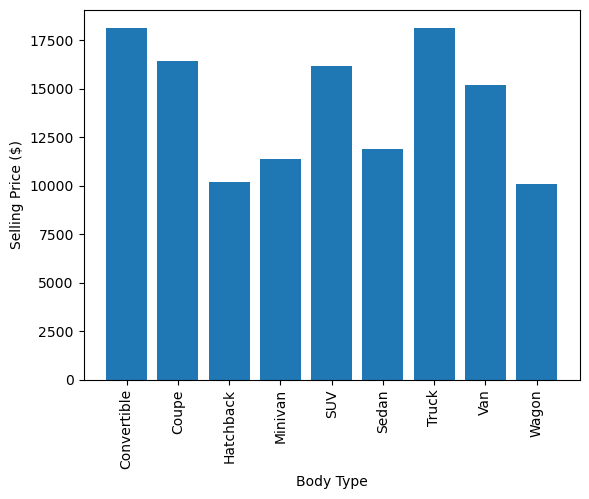

In [38]:
x_axis =  np.arange(len(stats_by_type))
tick_locations = [value for value in x_axis]
#plt.figure(figsize=(,2))
plt.bar(x_axis, stats_by_type['sellingprice'])

plt.xticks(tick_locations, stats_by_type['type'], rotation="vertical")
plt.xlabel('Body Type')
plt.ylabel('Selling Price ($)')
plt.show()

In [39]:
types = stats_by_type['type'].tolist()

# dicts to store values for each type
type_price_data = {type: [] for type in types}
trim_data = {type: [] for type in types}

count = 0
for type in types:
    temp = []
    for index, row in car_sales_update.iterrows():
        if row['type'] == type:
            type_price_data[type].append(row['sellingprice'])
            trim_data[type].append(row['trim'])



In [40]:
type_price_data

{'Convertible': [17500.0,
  67200.0,
  65000.0,
  65000.0,
  65000.0,
  67200.0,
  62000.0,
  65000.0,
  28750.0,
  37000.0,
  88500.0,
  49500.0,
  39500.0,
  50500.0,
  49000.0,
  40500.0,
  25750.0,
  49500.0,
  47000.0,
  25500.0,
  41500.0,
  22750.0,
  31500.0,
  27500.0,
  26750.0,
  27500.0,
  31500.0,
  52500.0,
  40000.0,
  42500.0,
  49500.0,
  44500.0,
  48000.0,
  43500.0,
  52250.0,
  35500.0,
  43500.0,
  27500.0,
  51500.0,
  25000.0,
  47000.0,
  44250.0,
  41000.0,
  28250.0,
  31750.0,
  49250.0,
  25000.0,
  22750.0,
  33000.0,
  40500.0,
  47000.0,
  40750.0,
  30000.0,
  42250.0,
  29000.0,
  51250.0,
  48500.0,
  31250.0,
  51500.0,
  22000.0,
  26500.0,
  42900.0,
  45500.0,
  27300.0,
  50000.0,
  32000.0,
  27500.0,
  16100.0,
  10000.0,
  154000.0,
  10700.0,
  11500.0,
  9000.0,
  11200.0,
  26250.0,
  11400.0,
  27500.0,
  53000.0,
  53500.0,
  27900.0,
  18750.0,
  58750.0,
  15250.0,
  15000.0,
  28500.0,
  20500.0,
  27000.0,
  31750.0,
  28000.0,
  2500

In [41]:
type_price_samples = {}

# Specify the number of elements to select from each list
num_elements_to_select = 1000

# Iterate over each key-value pair in the dictionary and select a random sample from each list
for key, values in type_price_data.items():
    selected_values = random.sample(values, num_elements_to_select)
    type_price_samples[key] = selected_values

# Print the randomly selected elements from each list
pprint(type_price_samples)

{'Convertible': [36750.0,
                 10900.0,
                 2700.0,
                 17800.0,
                 19500.0,
                 1900.0,
                 19400.0,
                 18500.0,
                 8500.0,
                 31250.0,
                 18700.0,
                 23000.0,
                 2000.0,
                 1400.0,
                 1150.0,
                 2550.0,
                 13100.0,
                 32200.0,
                 18250.0,
                 18300.0,
                 10600.0,
                 3200.0,
                 35000.0,
                 14400.0,
                 14000.0,
                 12700.0,
                 18300.0,
                 26500.0,
                 4250.0,
                 15900.0,
                 32250.0,
                 5700.0,
                 2300.0,
                 3300.0,
                 30500.0,
                 19500.0,
                 31525.0,
                 17300.0,
                 15000.0

In [42]:
type_price_data_samples = {}
num_elements = 1000

for key, values in type_price_data.items():
    random.shuffle(values)
    selection = values[:num_elements]
    type_price_data_samples[key] = selection



In [43]:
type_price_data_df = pd.DataFrame(type_price_data_samples)
type_price_data_df

,Convertible,Coupe,Hatchback,Minivan,SUV,Sedan,Truck,Van,Wagon
0,12300.0,33200.0,4300.0,10400.0,16600.0,13000.0,3000.0,20700.0,10000.0
1,10500.0,17300.0,6000.0,2000.0,15400.0,10500.0,29250.0,20500.0,8800.0
2,14500.0,3600.0,15000.0,11500.0,22800.0,4600.0,18400.0,10300.0,3600.0
3,3900.0,21600.0,4000.0,16500.0,16700.0,11400.0,9600.0,5200.0,12000.0
4,9900.0,27400.0,4900.0,18000.0,25200.0,6400.0,27200.0,22800.0,21600.0
...,...,...,...,...,...,...,...,...,...
995,15900.0,19300.0,15000.0,8500.0,12000.0,11000.0,28250.0,20900.0,15000.0
996,22000.0,38000.0,9900.0,16500.0,3000.0,1100.0,14500.0,22500.0,11100.0
997,49000.0,26200.0,11200.0,9200.0,12200.0,8800.0,1800.0,10800.0,10800.0
998,41000.0,42250.0,3500.0,11000.0,9700.0,11400.0,34000.0,10000.0,9500.0


In [44]:
type_price_summary = car_sales_update.groupby('type').agg({'sellingprice':['mean', 'median', 'var', 'std', 'sem']})
type_price_summary

sellingprice                                                 
                     mean   median           var           std         sem
type                                                                      
Convertible  18139.536733  14400.0  2.557029e+08  15990.713725  161.977483
Coupe        16438.050713  14900.0  1.919945e+08  13856.209626  102.819282
Hatchback    10163.397129  10000.0  3.005358e+07   5482.114680   35.519605
Minivan      11349.696508  11200.0  4.778355e+07   6912.564539   46.670310
SUV          16148.859831  15100.0  1.094838e+08  10463.450132   30.084283
Sedan        11895.366863  11200.0  6.485682e+07   8053.372945   17.239062
Truck        18149.389989  17900.0  1.051334e+08  10253.458219   50.952360
Van          15204.847284  18500.0  5.532157e+07   7437.847469  108.549910
Wagon        10102.426558   8800.0  5.676684e+07   7534.377012   63.087295

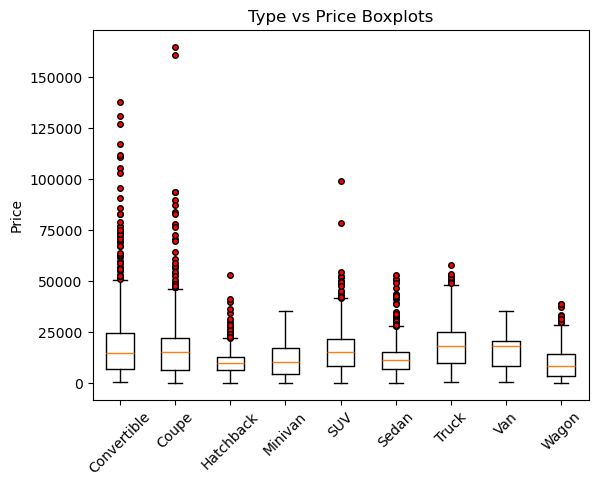

In [46]:
plt.boxplot(type_price_data_df, labels=types, flierprops={'markersize': 4, 'markerfacecolor': 'red'})
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.title('Type vs Price Boxplots')
plt.savefig('Output/typeVsPriceBoxplots.png')
plt.show()

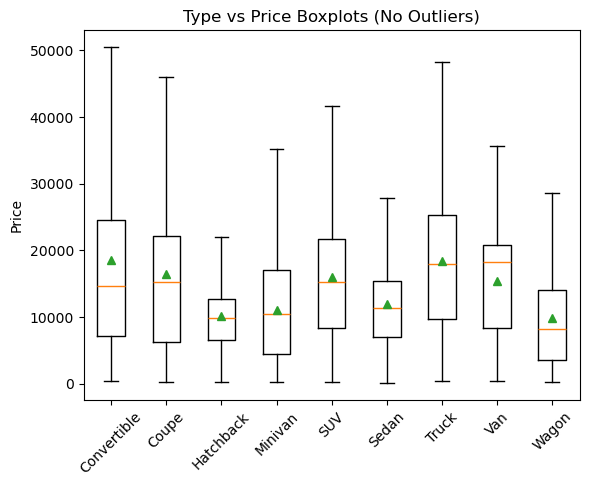

In [47]:
plt.boxplot(type_price_data_df, labels=types, showfliers=False, showmeans=True)
plt.ylabel('Price')
plt.title('Type vs Price Boxplots (No Outliers)')
plt.xticks(rotation=45)
plt.savefig('Output/typeVsPriceSansOutliers.png')
plt.show()

In [48]:
group = car_sales_update.groupby('make').count()
group 


,year,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,type
make,,,,,,,,,,,,,,,,
Acura,4503,4503,4503,4503,4503,4503,4503,4503,4503,4503,4503,4503,4503,4503,4503,4503
Aston Martin,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
Audi,4802,4802,4802,4802,4802,4802,4802,4802,4802,4802,4802,4802,4802,4802,4802,4802
BMW,17509,17509,17509,17509,17509,17509,17509,17509,17509,17509,17509,17509,17509,17509,17509,17509
Bentley,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105
Buick,4470,4470,4470,4470,4470,4470,4470,4470,4470,4470,4470,4470,4470,4470,4470,4470
Cadillac,6315,6315,6315,6315,6315,6315,6315,6315,6315,6315,6315,6315,6315,6315,6315,6315
Chevrolet,54150,54150,54150,54150,54150,54150,54150,54150,54150,54150,54150,54150,54150,54150,54150,54150
Chrysler,15133,15133,15133,15133,15133,15133,15133,15133,15133,15133,15133,15133,15133,15133,15133,15133


# Binned by Price

In [49]:
bins = [0, 10000, 20000, 30000, 40000, 50000, 1000000]
labels = ["<$10k", "$10k-20k", "$20k-30k", "$30k-40k", "$40k-50k", ">50k"] 

In [50]:
binned_by_price = car_sales_update.copy()

In [51]:
# Use `pd.cut` to categorize spending based on the bins.
binned_by_price['priceranges'] = pd.cut(binned_by_price['sellingprice'], bins, labels=labels)
binned_by_price['priceranges'].unique()

['$20k-30k', '>50k', '$10k-20k', '<$10k', '$30k-40k', '$40k-50k']
Categories (6, object): ['<$10k' < '$10k-20k' < '$20k-30k' < '$30k-40k' < '$40k-50k' < '>50k']

In [52]:
price_range_summary = binned_by_price.groupby('priceranges' , observed=True).agg({'sellingprice':'mean',
                                                                                  'year':'mean',
                                                                                  'mmr':'mean',
                                                                                  'color':'count',
                                                                                  'odometer':'mean'})
price_range_summary

,sellingprice,year,mmr,color,odometer
priceranges,,,,,
<$10k,5403.813896,2007.007301,5823.278024,179024,109369.680278
$10k-20k,14315.059040,2011.958421,14375.723465,199595,44921.367083
$20k-30k,24121.046464,2012.468522,24004.535507,69000,33513.044435
$30k-40k,34083.906740,2012.923167,33654.076134,17167,28543.884488
$40k-50k,44162.349003,2013.145226,43823.357817,4765,23477.118153
>50k,65551.656092,2013.254506,65208.741889,2774,16126.994232


In [53]:
under_10k = binned_by_price.loc[binned_by_price['priceranges'] == '<$10k', :] 
_10k_20k = binned_by_price.loc[binned_by_price['priceranges'] == '$10k-20k', :] 
_20k_30k = binned_by_price.loc[binned_by_price['priceranges'] == '$20k-20k', :] 
_30k_40k = binned_by_price.loc[binned_by_price['priceranges'] == '$30k-40k', :] 
_40k_50k = binned_by_price.loc[binned_by_price['priceranges'] == '$40k-50k', :] 
over_50k = binned_by_price.loc[binned_by_price['priceranges'] == '>50k', :] 


In [54]:
test = under_10k.groupby('type').count()
test['year']

type
Convertible     3380
Coupe           6109
Hatchback      12037
Minivan         9841
SUV            36642
Sedan          91113
Truck          10579
Van             1416
Wagon           7907
Name: year, dtype: int64

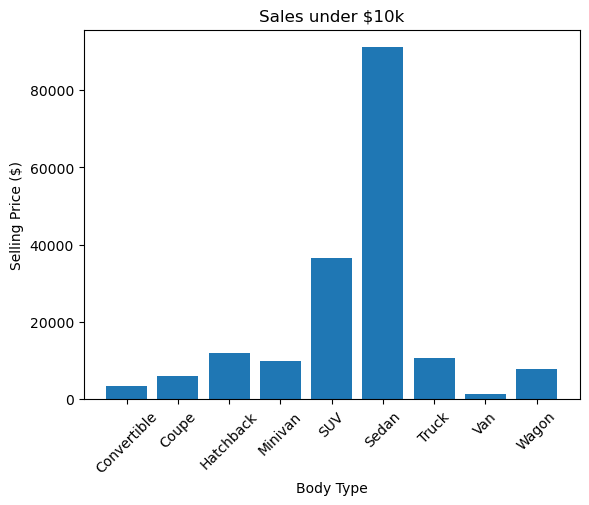

In [55]:
x_axis =  np.arange(len(stats_by_type))
tick_locations = [value for value in x_axis]
#plt.figure(figsize=(,2))
plt.bar(x_axis, test['year'])

plt.title('Sales under $10k')
plt.xticks(tick_locations, stats_by_type['type'], rotation=45)
plt.xlabel('Body Type')
plt.ylabel('Selling Price ($)')
plt.show()

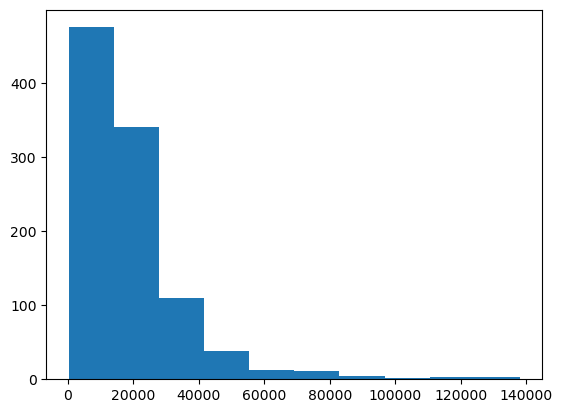

In [56]:
plt.hist(type_price_data_df['Convertible'])
plt.show()

In [57]:
# Table with summary stats of each type of vehicle
type_summary_mean = car_sales_update.groupby('type').agg({'sellingprice':'mean', 'mmr':'mean', 'year': 'mean', 'odometer': 'mean'})

type_summary_mean = type_summary_mean.reset_index()
type_summary_mean

,type,sellingprice,mmr,year,odometer
0,Convertible,18139.536733,18298.917505,2008.781141,60128.228504
1,Coupe,16438.050713,16543.861847,2009.514344,62864.460768
2,Hatchback,10163.397129,10293.928676,2011.088745,51325.281264
3,Minivan,11349.696508,11452.448947,2010.314933,76658.012626
4,SUV,16148.859831,16285.003885,2010.037299,71563.786539
5,Sedan,11895.366863,12056.728923,2010.457003,62190.337693
6,Truck,18149.389989,18308.776175,2009.529657,80266.195229
7,Van,15204.847284,15325.617678,2011.295421,71035.900106
8,Wagon,10102.426558,10219.755662,2009.735259,74299.035476


In [58]:
type_summary_med = car_sales_update.groupby('type').agg({'sellingprice':'median', 'mmr':'median', 
                                                         'year': 'median', 'odometer': 'median'})
type_summary_med = type_summary_med.reset_index()
type_summary_med

,type,sellingprice,mmr,year,odometer
0,Convertible,14400.0,14625.0,2010.0,53022.5
1,Coupe,14900.0,15000.0,2011.0,44261.0
2,Hatchback,10000.0,10250.0,2012.0,38455.0
3,Minivan,11200.0,11150.0,2012.0,64474.0
4,SUV,15100.0,15250.0,2011.0,57561.0
5,Sedan,11200.0,11350.0,2012.0,45818.0
6,Truck,17900.0,18050.0,2011.0,69953.0
7,Van,18500.0,18850.0,2013.0,34273.0
8,Wagon,8800.0,8925.0,2010.0,69712.0


# Data should be binned by sell price. Then we can check this (below) again.

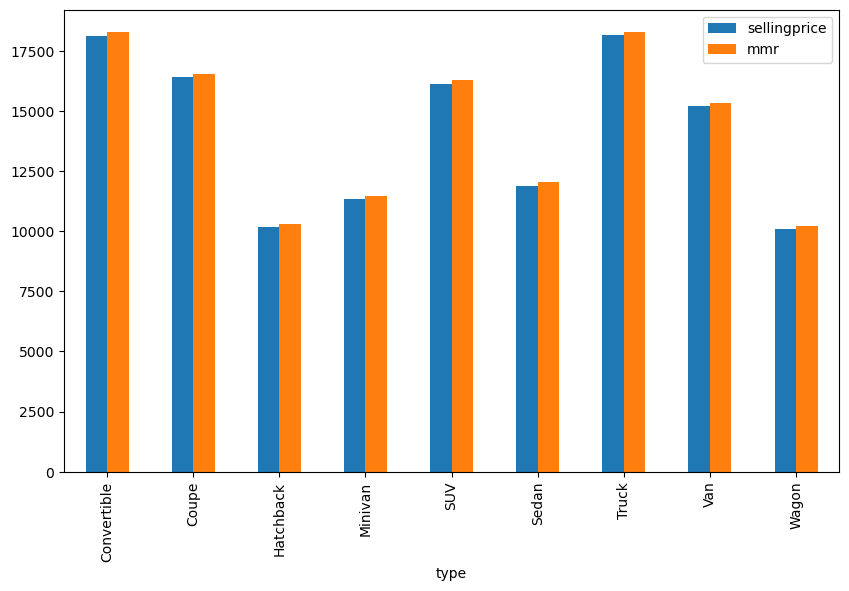

In [59]:
type_summary_mean.plot.bar(x='type', y=['sellingprice', 'mmr'], figsize=(10, 6))
plt.show()

<Axes: xlabel='type'>

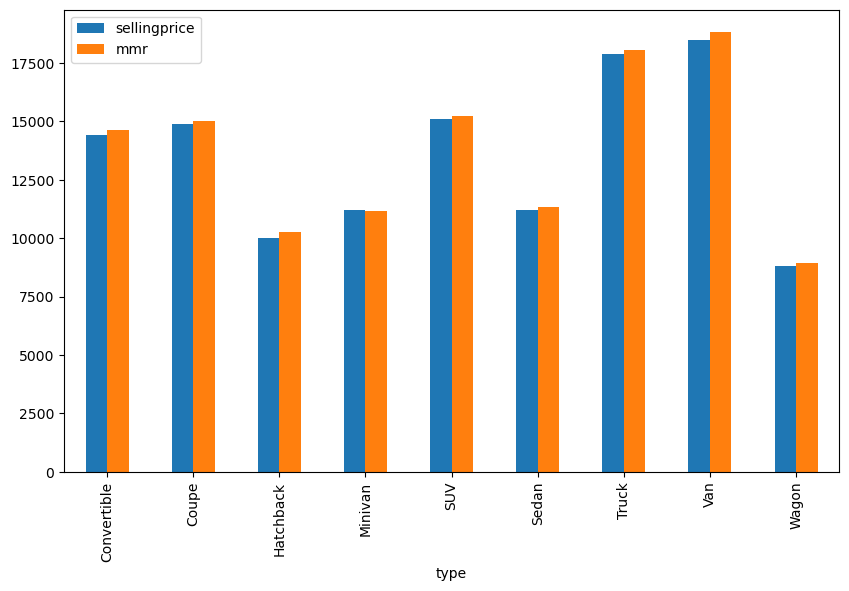

In [60]:
type_summary_med.plot.bar(x='type', y=['sellingprice', 'mmr'], figsize=(10, 6))

# Type Comparison Options

Instead of using correlation coefficients, you can explore other statistical methods to analyze the relationship between vehicle type and another variable. Here are a few approaches you can consider:

ANOVA (Analysis of Variance): You can use ANOVA to compare the means of a numerical variable across different categories of a categorical variable (e.g., vehicle type). ANOVA can help determine if there are significant differences in the numerical variable based on the categories of the categorical variable.

Chi-Square Test: If you want to analyze the association between vehicle type and another categorical variable, you can use a Chi-Square test. This test can help determine if there is a significant relationship between the two categorical variables.

Visualization: Creating visualizations such as bar charts, box plots, or violin plots can also help you visually explore the relationship between vehicle type and another variable.



<Axes: title={'center': 'sellingprice'}, xlabel='type'>

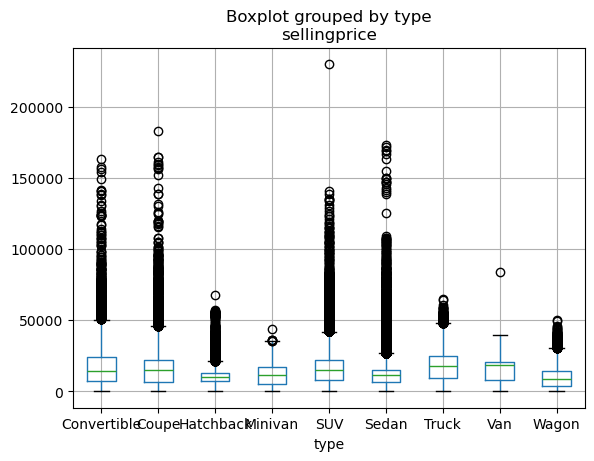

In [61]:
car_sales_update.boxplot("sellingprice", by="type")

<Axes: title={'center': 'sellingprice'}, xlabel='make'>

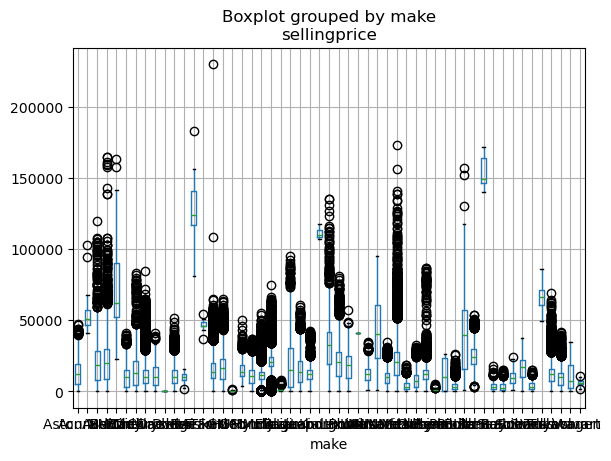

In [62]:
car_sales_update.boxplot("sellingprice", by="make")

In [63]:
suv = car_sales_update[car_sales_update['type'] == 'SUV']['sellingprice']
suv

0         21500.0
1         21500.0
13        21500.0
17        40000.0
31        47500.0
           ...   
558821    11400.0
558825    11750.0
558826    17300.0
558827    24500.0
558834    34000.0
Name: sellingprice, Length: 120968, dtype: float64

In [64]:
type_prices = {}

for type in types:
    type_prices[type] = car_sales_update[car_sales_update['type'] == type]['sellingprice']

In [65]:
types

['Convertible',
 'Coupe',
 'Hatchback',
 'Minivan',
 'SUV',
 'Sedan',
 'Truck',
 'Van',
 'Wagon']

In [66]:
suv = car_sales_update[car_sales_update['type'] == 'SUV']['sellingprice']
convertible = car_sales_update[car_sales_update["type"] == 'Convertible']["sellingprice"]
coupe = car_sales_update[car_sales_update["type"] == 'Coupe']["sellingprice"]

In [67]:
stats.f_oneway(type_prices['Convertible'], type_prices['Coupe'], type_prices['SUV'], type_prices['Sedan'], 
               type_prices['Hatchback'], type_prices['Minivan'], type_prices['Truck'], type_prices['Van'],
               type_prices['Wagon'])

F_onewayResult(statistic=4640.068141742107, pvalue=0.0)

# Correlation Matrix Options
## For each vehicle type comparing time of year and number of sales
Filter Data by Vehicle Type: Separate your dataset into subsets based on each vehicle type. This will allow you to focus on one vehicle type at a time for correlation analysis.

Calculate Correlation Coefficients: For each subset corresponding to a specific vehicle type, calculate the correlation coefficients between the time of year (e.g., month or quarter) and the number of sales. You can use methods like Pearson correlation, Spearman correlation, or Kendall correlation depending on the nature of your data.

Create Correlation Matrices: Generate correlation matrices for each vehicle type, showing the correlation coefficients between the time of year and the number of sales. You can visualize these matrices using heatmaps to easily identify patterns and relationships.

Interpret Results: Analyze the correlation matrices to understand the strength and direction of the relationships between the time of year and the number of sales for each vehicle type. Look for any significant correlations or trends that may vary across different vehicle types.

Repeat for Each Vehicle Type: Repeat the process for each vehicle type in your dataset to compare how the time of year correlates with the number of sales for different vehicle categories.

By creating separate correlation matrices for each vehicle type and comparing the time of year with the number of sales, you can gain insights into how sales performance varies across different vehicle types throughout the year. This approach can help you identify seasonal trends, patterns, and potential factors influencing sales for each vehicle category.

One other possibility is seeing sales per type per month

In [68]:
test = car_sales_update.iloc[0,15]
test.split()[1]

'Dec'

In [69]:
car_sales_update['month'] = car_sales_update['saledate'].str.split().str[1]
car_sales_update['saleyear'] = car_sales_update['saledate'].str.split().str[3]
car_sales_update['day'] = car_sales_update['saledate'].str.split().str[2]

In [70]:
car_test['month'] = car_sales_update['saledate'].str.split().str[1]
car_test['saleyear'] = car_sales_update['saledate'].str.split().str[3]
car_test['day'] = car_sales_update['saledate'].str.split().str[2]

In [71]:
car_test['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', '3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'], dtype=object)

In [72]:
grouped = car_sales_update.groupby('month')

month_dataframes = {month: group for month, group in grouped}

month_dataframes.keys()

#per_month_counts = {}

#for month in month_dataframes.keys():
#    per_month_counts.update({month:month_dataframes[month].groupby('type').count()['year']})


dict_keys(['Apr', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May'])

In [73]:
group_types = car_sales_update.groupby('type')

type_dataframes = {type: group for type, group in group_types}

convertible = type_dataframes['Convertible'].groupby('month').count()['year']

convertible

month
Apr      31
Dec     840
Feb    2879
Jan    2370
Jul      37
Jun    1769
Mar     844
May     976
Name: year, dtype: int64

In [76]:
#months = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul']

#for 
#plt.plot(months, convertible)

In [77]:
#months = ['J', 'F', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'S', 'O', 'N', 'D']
#counts = [month_dataframes['Jan']['year'].count(),
#          month_dataframes['Feb']['year'].count(),
#          month_dataframes['Mar']['year'].count(),
#          month_dataframes['Apr']['year'].count()
#test

In [78]:
date_test = car_test.copy()
#date_test.loc[date_test['saledate'],:]
date_test

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,month,saleyear,day
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Dec,2014,16
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Dec,2014,16
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Jan,2015,15
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Jan,2015,29
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Dec,2014,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),NaN,NaN,NaN
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Jul,2015,08
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Jul,2015,08
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),Jul,2015,09


In [79]:

date_test['saledate'] = date_test['saledate'].astype(str)

date_values = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','2014','2015']

pattern = '|'.join(date_values)

filtered = date_test[~date_test['saledate'].str.contains(pattern)]

len(filtered.index)

38

In [80]:
clean_date = date_test.drop(filtered.index)
clean_date.reset_index(drop=True)



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,month,saleyear,day
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Dec,2014,16
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Dec,2014,16
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Jan,2015,15
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Jan,2015,29
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Dec,2014,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558794,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),NaN,NaN,NaN
558795,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Jul,2015,08
558796,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Jul,2015,08
558797,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),Jul,2015,09


In [81]:
clean_date['type'] = car_sales_df_clean['body'].apply(categorize)
clean_date['type'].unique()

array(['Error', 'Sedan', nan, 'Wagon', 'Hatchback', 'Truck', 'Minivan',
       'Van'], dtype=object)

In [266]:
clean_date = clean_date.dropna(subset=['type'])
clean_date['type'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Truck', 'Minivan', 'Van'], dtype=object)

In [267]:
clean_date['saledate'] = pd.to_datetime(clean_date['saledate'], format='mixed', utc=True)
#clean_date['saledate'] = clean_date['saledate'].dt.date



In [268]:
clean_date['month'] = clean_date['saledate'].dt.month
clean_date['day'] = clean_date['saledate'].dt.day
clean_date['saleyear'] = clean_date['saledate'].dt.year
clean_date['day'].unique()


array([16, 14, 28, 18, 30, 17, 19, 13, 23,  7,  2,  6, 25, 11, 12,  3,  5,
       21, 29, 26, 31, 20,  8, 22, 10, 27,  9,  4, 24, 15,  1],
      dtype=int32)

In [271]:
len(lines_to_drop.index)

188

In [297]:
test = clean_date.sort_values(by='saledate')
test.head(60)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,type,month,day,saleyear
5310,2014,Hyundai,Sonata,SE,Sedan,automatic,5npec4ab7eh857804,ca,44.0,6759.0,white,black,hyundai motor america/co car,20400.0,19600.0,2014-12-16 04:00:00+00:00,Sedan,12,16,2014
1552,2012,Infiniti,G Sedan,G37 Journey,G Sedan,automatic,jn1cv6ap2cm620734,ca,4.0,42171.0,gray,black,tradewinds remarketing,20400.0,20250.0,2014-12-16 04:00:00+00:00,Sedan,12,16,2014
1542,2012,Jeep,Liberty,Sport,SUV,automatic,1c4pjlak5cw208177,ca,43.0,29745.0,silver,black,remarketing by ge/mission fcu,14750.0,15750.0,2014-12-16 04:00:00+00:00,SUV,12,16,2014
5907,2014,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap9ec271529,ca,3.0,18493.0,white,black,enterprise vehicle exchange / tra / rental / t...,14750.0,13000.0,2014-12-16 04:00:00+00:00,Sedan,12,16,2014
1522,2012,Kia,Sorento,SX,SUV,automatic,5xykw4a2xcg255560,ca,39.0,57480.0,white,black,kia motors finance,18300.0,19400.0,2014-12-16 04:00:00+00:00,SUV,12,16,2014
4484,2004,GMC,Envoy XL,SLE,SUV,automatic,1gkes16s046240381,ca,36.0,100462.0,gray,gray,billotti auto sales,4725.0,6400.0,2014-12-16 04:00:00+00:00,SUV,12,16,2014
1504,2012,Kia,Optima,Hybrid,Sedan,automatic,knagm4ad8c5031853,ca,38.0,49523.0,silver,black,kia motors finance,13750.0,14200.0,2014-12-16 04:00:00+00:00,Sedan,12,16,2014
5921,2014,Toyota,Prius,Two,Hatchback,automatic,jtdkn3du8e0363209,ca,2.0,24696.0,silver,gray,enterprise vehicle exchange / tra / rental / t...,17300.0,10500.0,2014-12-16 04:00:00+00:00,Hatchback,12,16,2014
5873,2014,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap9ec124806,ca,1.0,37271.0,white,black,enterprise vehicle exchange / tra / rental / t...,13800.0,12100.0,2014-12-16 04:00:00+00:00,Sedan,12,16,2014
4557,2004,Honda,Civic,Value Package,Coupe,automatic,1hgem22184l049027,ca,3.0,164116.0,blue,gray,charitable auto resource,1875.0,1900.0,2014-12-16 04:00:00+00:00,Coupe,12,16,2014


In [298]:
lines_to_drop = clean_date.loc[(clean_date['month'] == 2) & (clean_date['saleyear'] == 2014), :]
clean_date = clean_date.drop(lines_to_drop.index)
clean_sorted = clean_date.sort_values(by=['saleyear', 'month','day'])
clean_sorted.head(60)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,type,month,day,saleyear
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00,SUV,12,16,2014
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00,SUV,12,16,2014
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,2014-12-16 05:00:00+00:00,Sedan,12,16,2014
10,2014,Audi,A6,3.0T Prestige quattro,Sedan,automatic,wauhgafc0en062916,ca,48.0,14414.0,black,black,desert auto trade,47300.0,49750.0,2014-12-16 04:30:00+00:00,Sedan,12,16,2014
11,2015,Kia,Optima,LX,Sedan,automatic,5xxgm4a73fg353538,ca,48.0,2034.0,red,tan,kia motors finance,15150.0,17700.0,2014-12-16 04:00:00+00:00,Sedan,12,16,2014
13,2015,Kia,Sorento,LX,SUV,automatic,5xyktca66fg561407,ca,5.0,14634.0,silver,black,kia motors america inc,20600.0,21500.0,2014-12-16 04:30:00+00:00,SUV,12,16,2014
32,2015,Kia,Sorento,LX,SUV,automatic,5xyktca60fg565226,ca,5.0,13757.0,red,black,kia motors america inc,20600.0,20750.0,2014-12-16 04:30:00+00:00,SUV,12,16,2014
34,2015,Kia,Sorento,LX,SUV,automatic,5xyktca68fg559481,ca,44.0,12862.0,gray,black,kia motors america inc,20700.0,21000.0,2014-12-16 04:30:00+00:00,SUV,12,16,2014
49,2015,Kia,Sorento,LX,SUV,automatic,5xyktca67fg570973,ca,5.0,13878.0,silver,black,kia motors america inc,20600.0,20750.0,2014-12-16 04:30:00+00:00,SUV,12,16,2014
55,2015,Kia,Sorento,LX,SUV,automatic,5xyktca63fg570727,ca,48.0,10357.0,silver,gray,kia motors america inc,20700.0,20500.0,2014-12-16 04:30:00+00:00,SUV,12,16,2014


In [353]:
test = clean_sorted.groupby(['type', 'saleyear', 'month'])['year'].count()
test = test.reset_index()
test['per_type_index'] = None
count = 0
for index, row in test.iterrows():
    if     


,type,saleyear,month,year,per_type_index
0,Convertible,2014,12,840,None
1,Convertible,2015,1,2366,None
2,Convertible,2015,2,2879,None
3,Convertible,2015,3,846,None
4,Convertible,2015,4,29,None
...,...,...,...,...,...
67,Wagon,2015,3,1250,None
68,Wagon,2015,4,27,None
69,Wagon,2015,5,1223,None
70,Wagon,2015,6,2370,None


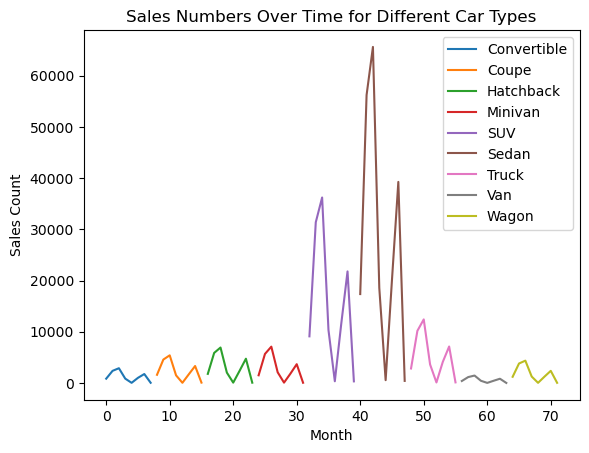

In [335]:
fig, ax = plt.subplots()

# Iterate over unique car types and plot sales count over time
for type, group in test.groupby('type'):
    ax.plot(group.index, group['year'], label=type)

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Sales Count')
ax.set_title('Sales Numbers Over Time for Different Car Types')

# Add legend
ax.legend()

# Display the plot
plt.show()

In [343]:
group_types_clean = clean_sorted.groupby('type')

type_dataframes_clean = {type: group for type, group in group_types_clean}

conv = type_dataframes_clean['Convertible'].groupby(['saleyear', 'month'])['year'].count().reset_index()
coupe = type_dataframes_clean['Coupe'].groupby(['saleyear', 'month'])['year'].count().reset_index()
minivan = type_dataframes_clean['Minivan'].groupby(['saleyear', 'month'])['year'].count().reset_index()
suv = type_dataframes_clean['SUV'].groupby(['saleyear', 'month'])['year'].count().reset_index()
sedan = type_dataframes_clean['Sedan'].groupby(['saleyear', 'month'])['year'].count().reset_index()
truck = type_dataframes_clean['Truck'].groupby(['saleyear', 'month'])['year'].count().reset_index()
van = type_dataframes_clean['Van'].groupby(['saleyear', 'month'])['year'].count().reset_index()
wagon = type_dataframes_clean['Wagon'].groupby(['saleyear', 'month'])['year'].count().reset_index()

type_df_list = [conv, coupe, minivan, suv, sedan, truck, van, wagon]

In [392]:
conv_dict = {'Convertible': type_dataframes_clean['Convertible'].groupby(['saleyear', 'month'])['year'].count().reset_index()}
coupe_dict = {'Coupe': type_dataframes_clean['Coupe'].groupby(['saleyear', 'month'])['year'].count().reset_index()}
minivan_dict = {'Minivan': type_dataframes_clean['Minivan'].groupby(['saleyear', 'month'])['year'].count().reset_index()}
suv_dict = {'SUV': type_dataframes_clean['SUV'].groupby(['saleyear', 'month'])['year'].count().reset_index()}
sedan_dict = {'Sedan': type_dataframes_clean['Sedan'].groupby(['saleyear', 'month'])['year'].count().reset_index()}
truck_dict = {'Truck': type_dataframes_clean['Truck'].groupby(['saleyear', 'month'])['year'].count().reset_index()}
van_dict = {'Van': type_dataframes_clean['Van'].groupby(['saleyear', 'month'])['year'].count().reset_index()}
wagon_dict = {'Wagon': type_dataframes_clean['Wagon'].groupby(['saleyear', 'month'])['year'].count().reset_index()}

type_dict_list = [conv_dict, coupe_dict, minivan_dict, suv_dict, sedan_dict, truck_dict, van_dict, wagon_dict]


In [372]:
test_convert = {'Convertible': type_dataframes_clean['Convertible'].groupby(['saleyear', 'month'])['year'].count().reset_index()}
test_convert

{'Convertible':    saleyear  month  year
 0      2014     12   840
 1      2015      1  2366
 2      2015      2  2879
 3      2015      3   846
 4      2015      4    29
 5      2015      5  1000
 6      2015      6  1745
 7      2015      7    37}

In [346]:
c

In [200]:
date_values = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul']

#date_test['saledate'] = pd.to_datetime(date_test['saledate'], format='mixed', utc=True)
#date_test['saledate'] = date_test['saledate'].dt.date

In [312]:
grouped_data = convertible_clean.groupby(['saleyear', 'month'])['year'].count()
grouped_data = grouped_data.reset_index()

In [324]:
grouped_data

,saleyear,month,year
0,2014,12,840
1,2015,1,2366
2,2015,2,2879
3,2015,3,846
4,2015,4,29
5,2015,5,1000
6,2015,6,1745
7,2015,7,37


In [384]:
len(type_dict_list[0]['Convertible'])

8

In [385]:
x_axis_dates = ["Dec '14", "Jan '15", "Feb '15", "Mar '15", "Apr '15", "May '15", "June '15", "July '15"]

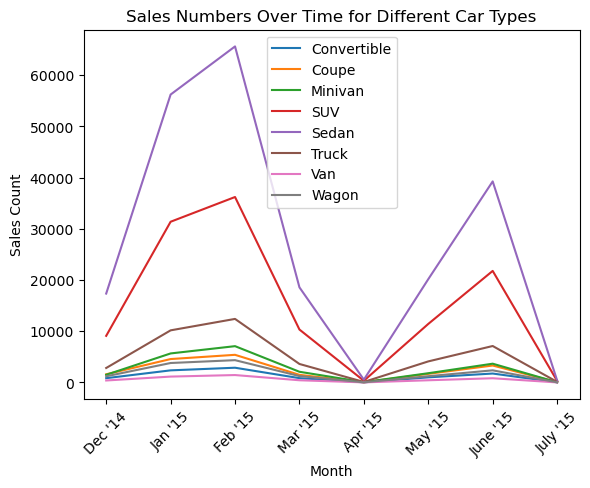

In [391]:
fig, ax = plt.subplots()
x_axis =  np.arange(8)
tick_locations = [value for value in x_axis]
#plt.figure(figsize=(,2))



# Iterate over unique car types and plot sales count over time
for dictionary in type_dict_list:
    for name, type in dictionary.items():
        ax.plot(type.index, type['year'], label = name)

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Sales Count')
ax.set_title('Sales Numbers Over Time for Different Car Types')
plt.xticks(tick_locations, x_axis_dates, rotation=45)
# Add legend
ax.legend()

# Display the plot
plt.show()

In [400]:
test = clean_sorted.loc[clean_sorted['make'] == 'Chevrolet', :]
test = test.groupby(['model'])['year'].count()
test.sort_values()

model
Corsica                     1
Spark EV                    2
C/K 2500 Series             2
Silverado 1500 Hybrid       3
S-10 Blazer                 3
                         ... 
Equinox                  4338
Cruze                    5402
Silverado 1500           5685
Malibu                   6211
Impala                   7499
Name: year, Length: 62, dtype: int64

In [404]:
top_four = clean_sorted.loc[(clean_sorted['model'] == 'Camry') | 
                            (clean_sorted['model'] == 'Altima') |
                            (clean_sorted['model'] == 'Impala') |
                            (clean_sorted['model'] == 'F-150'), :]

In [408]:
test = top_four.groupby(['model','trim','saleyear', 'month'])['sellingprice'].mean()
test.reset_index()

,model,trim,saleyear,month,sellingprice
0,Altima,2.5,2014,12,12434.107034
1,Altima,2.5,2015,1,11960.245810
2,Altima,2.5,2015,2,12606.120344
3,Altima,2.5,2015,3,12828.582923
4,Altima,2.5,2015,4,12400.000000
...,...,...,...,...,...
317,Impala,SS,2015,2,5717.741935
318,Impala,SS,2015,3,5745.238095
319,Impala,SS,2015,4,11600.000000
320,Impala,SS,2015,5,5761.111111


In [ ]:
trim_dataframes_clean = {type: group for type, group in group_types_clean}

altima = trim_dataframes_clean['Convertible'].groupby(['saleyear', 'month'])['year'].count().reset_index()
coupe = type_dataframes_clean['Coupe'].groupby(['saleyear', 'month'])['year'].count().reset_index()
minivan = type_dataframes_clean['Minivan'].groupby(['saleyear', 'month'])['year'].count().reset_index()
suv = type_dataframes_clean['SUV'].groupby(['saleyear', 'month'])['year'].count().reset_index()
sedan = type_dataframes_clean['Sedan'].groupby(['saleyear', 'month'])['year'].count().reset_index()
truck = type_dataframes_clean['Truck'].groupby(['saleyear', 'month'])['year'].count().reset_index()
van = type_dataframes_clean['Van'].groupby(['saleyear', 'month'])['year'].count().reset_index()
wagon = type_dataframes_clean['Wagon'].groupby(['saleyear', 'month'])['year'].count().reset_index()

type_df_list = [conv, coupe, minivan, suv, sedan, truck, van, wagon]

In [326]:

# Sample data (replace this with your actual DataFrame)
data = {
    'year': [2021, 2021, 2021, 2021, 2021, 2021],
    'month': [1, 2, 3, 1, 2, 3],
    'car_type': ['SUV', 'SUV', 'SUV', 'Sedan', 'Sedan', 'Sedan'],
    'count': [100, 120, 90, 80, 100, 110]
}

df = pd.DataFrame(data)
df

,year,month,car_type,count
0,2021,1,SUV,100
1,2021,2,SUV,120
2,2021,3,SUV,90
3,2021,1,Sedan,80
4,2021,2,Sedan,100
5,2021,3,Sedan,110


In [ ]:
path = "Output/price_data_per_type.json"

with open(path, 'w') as file:
    json.dump(type_price_data, file)

In [234]:
tester.to_csv("Output/test.csv",
            encoding="utf-8", index=False, header=True)

In [ ]:
car_sales_update.to_csv("Output/car_sales_clean.csv",
                        encoding="utf-8", index=False, header=True)

In [ ]:
appended_df.to_csv("Output/car_sales_extended.csv",
                           encoding="utf-8", index=False, header=True)